# Introduction to Linear Regression

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os   #rm rmdir getcwd and so on functions
import scipy as sp #scientific computation library

from mpl_toolkits.mplot3d import axes3d   #in case we need to plot 3d
import seaborn as sns  #another package for pretty graphs

from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity  #what's this for?  actually no idea*****

## example：fit a straight line 

Regression: learning the intercept and the slope of a straight line fit to a set of points. 
Generate a set of noisy samples from a linear function f1 and the visualise the function using matplotlib.pyplot(plt)

(50,)
draw a scatter


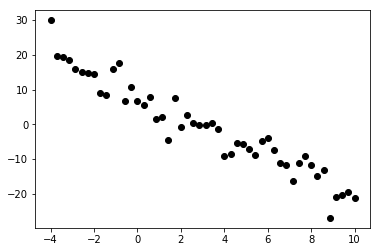

In [3]:
def  f1(x,m,c):
    return m*x+c
xmin,xmax,npts=[-4,10,50]
X=np.linspace(xmin,xmax,npts) #define the domain of the function 
print(np.shape(X))

y0=f1(X,-3.,9.)+np.random.normal(0,scale=4,size=np.shape(X))
#normal function: 0 is the mean, scale is the standard deviation
plt.scatter(X,y0,marker='o',c='k')
#print(y0) #y0 is a n-dimension vector
print("draw a scatter")
#scatter. it's not line. 
#** to search and remeber which kinds of figures are there.***

In [3]:
# this is just fot the test for linspace()

# N=8
# y=np.zeros(N)
# x1=np.linspace(0,10,N,endpoint=True)
# x2=np.linspace(0,10,N,endpoint=False)
# plt.plot(x1,y,'o')
# plt.plot(x2,y+0.5,'o')
# plt.ylim([-0.5,1])



### next step: 
create a design matrix:
hte matrix is used to denote the domain for calculating.  

In [14]:
def designmat1(Xmat):
    X=np.atleast_2d(Xmat).T   
    #view inputs as arrays with at least two dimension
    col1=np.ones(np.shape(X)[0]).reshape(np.shape(X)[0],1)
    #ones() is a vector of dimension which is the same with rows num
    #reshape make it column vector
    X=np.concatenate((col1,X),axis=1)
    #like joint. axis mean columns
    print(X)
    return X
#Xmat=designmat1(X)
#print(Xmat)
#Xmat.shape  #(50,2)
#this is the linear regression with one variable, so that's why design the designmatrix. not suitable for multiple var

#y=ax1+bx2+c
#y=w0+w1x1+w2X2+...+   linear regression with multiple var, need to use matrix 

#it's different between the two situations*******************************

## Find optimal weights by gradient descent
find the weight vector w:
r(w):=y-wX   
rss 
gradient 
(w and X both are matrix)

In [18]:
def gradsqloss(Amat,y,wt):
    n,p=Amat.shape
#     print("shit",p)
    return (-2/n)*Amat.T.dot((y-Amat.dot(wt)))
    #print(np.shape(y-Amat.dot(wt)))    #output：(50,) 是一个向量
    #this is the gradient of the square loss function
    #********************should review 
    #-2/n*AT*(y-A*wt) 这个是关于权重w的函数，所以AT提到括号外面   AT其实是X，这个是损失函数的梯度
    #因为Amat是（50,2），所以要取转置才能和（50，）的残差向量点乘。结果是（2，1）的向量输出
    
    
def gradientdescent(Amat,y,winit,rate,numiter):
    n,p=Amat.shape    #50,2
    whistory=[]
    meanrsshistory=[]  #mean of redisuals 
    w=winit    #init w0   w是个向量，2 dimensions
    
    for i in range(numiter):   #70次
        meanrss=np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        meanrsshistory.append(meanrss)
        grad=gradsqloss(Amat,y,w)  #计算损失函数的梯度
        #print(grad.size)  #grad是个numpy.ndarray类型的，size为2
        #print(grad)   #梯度是二维向量。
        w=w-rate*grad  
        #w 权重要不停迭代，rate是学习率。
        #真正迭代是损失函数的梯度grad为0的时候，这里强制规定了迭代次数为70次
        #r=1/n*(y-Aw)   A的第一列全是1，第二列是定义域。w是每次的斜率
    return w,np.asarray(whistory),np.asarray(meanrsshistory)
    #返回最终的权重w,即为斜率。其他分别为w的历史值，loss的历史值
        

[[ 1.         -4.        ]
 [ 1.         -3.71428571]
 [ 1.         -3.42857143]
 [ 1.         -3.14285714]
 [ 1.         -2.85714286]
 [ 1.         -2.57142857]
 [ 1.         -2.28571429]
 [ 1.         -2.        ]
 [ 1.         -1.71428571]
 [ 1.         -1.42857143]
 [ 1.         -1.14285714]
 [ 1.         -0.85714286]
 [ 1.         -0.57142857]
 [ 1.         -0.28571429]
 [ 1.          0.        ]
 [ 1.          0.28571429]
 [ 1.          0.57142857]
 [ 1.          0.85714286]
 [ 1.          1.14285714]
 [ 1.          1.42857143]
 [ 1.          1.71428571]
 [ 1.          2.        ]
 [ 1.          2.28571429]
 [ 1.          2.57142857]
 [ 1.          2.85714286]
 [ 1.          3.14285714]
 [ 1.          3.42857143]
 [ 1.          3.71428571]
 [ 1.          4.        ]
 [ 1.          4.28571429]
 [ 1.          4.57142857]
 [ 1.          4.85714286]
 [ 1.          5.14285714]
 [ 1.          5.42857143]
 [ 1.          5.71428571]
 [ 1.          6.        ]
 [ 1.          6.28571429]
 

Text(0, 0.5, 'mean of sum of squares of residual')

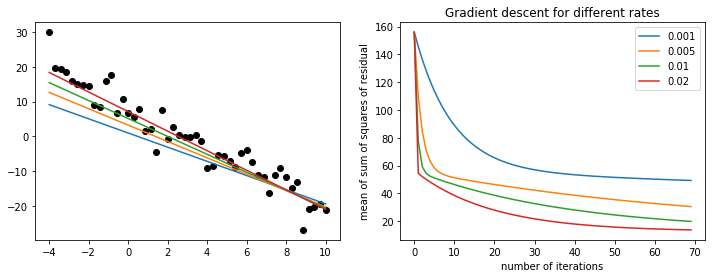

In [19]:
Xmat=designmat1(X)   #X is the domain of x
#这里生成了一个矩阵，n*2的矩阵，n为50（散点的数目）
#第一列全是1，第二列是定义域 -4到50，100个点的x取值
n,p=Xmat.shape   #50,2
#print(n,p)
w0=np.random.randn(p)   #初始权重。包含两个元素的向量
#print(w0)

num_iters=70 #迭代70次
#exercise:try more iterations times
#num_iters=2000  

rates=[.001,.005,.01,.02]  #different learning rates

#exercise: try other learning rates

xinput=np.linspace(-4,10,100)   #这里输入100个点
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,4)) #画两个图
ax[0].scatter(X,y0,marker='o',color='k')   #还是画出最开始的50个点

for i,r in enumerate(rates):   #index and number 
    wfin,whist,meanlosstrace=gradientdescent(Xmat,y0,w0,r,num_iters)
    ax[1].plot(meanlosstrace,label=r)
    ax[0].plot(xinput,wfin[0]+wfin[1]*xinput)
    #wfin是个向量，第一个向量为c，第二个向量为a. y=c+ax
    
ax[1].legend()
ax[1].set_title("Gradient descent for different rates")
ax[1].set_xlabel("number of iterations")
ax[1].set_ylabel("mean of sum of squares of residual")


    

# Using scikit-learn to get the solution
first: split data into training and the test data.

training pair (33,) (33,) testing pair (17,) (17,)


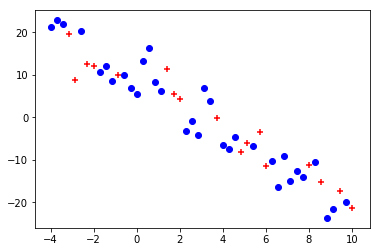

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y0,test_size=0.33,random_state=42)  
#by adding random_state this parameter, it will return a certain series of data. Or every time it will be different
plt.scatter(X_train,y_train,c='b')
plt.scatter(X_test,y_test,marker='+',c='r')
print("training pair",X_train.shape,y_train.shape,"testing pair",X_test.shape,y_test.shape)

In [11]:
from sklearn import linear_model
X_train,X_test,y_train,y_test=train_test_split(X,y0,test_size=0.33,random_state=42)

X_train=np.atleast_2d(X_train).T
print("checking that the shape of arrays are compatible",X_train.shape,y_train.shape)

regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)
#this is the common interface for all data fitting procedures in scikit-learn
print("trained model has slope",regr.coef_[0]," and intercept",regr.intercept_)
#the coef_ and intercept are the attributes of the class

yhat0=(regr.intercept_+np.atleast_2d(X_train*regr.coef_)).T
print('explicit caculation',yhat0)
y_fit0=regr.predict(X_train)
print("using scikit-learn",y_fit0)
#just to tell us that we can do the prediction by the two means. and they all works.


checking that the shape of arrays are compatible (33, 1) (33,)
trained model has slope -3.04744488245  and intercept 9.96932590985
explicit caculation [[-17.8930273  -18.76372584   9.09862737  14.3228186    8.22792883
    1.26234053  -7.44464485  -4.83254923  22.15910544 -16.15163023
   -1.34975508  -6.57394631  17.80561275  -3.09115216  12.58142152
   -9.18604192  21.2884069    3.87443614  20.41770836 -15.28093169
   -8.31534338   2.13303907 -12.66883607  13.45212006   3.00373761
    6.48653176 -20.50512291   4.74513468  16.06421567 -14.41023315
    9.96932591  -2.22045362 -10.927439  ]]
using scikit-learn [-17.8930273  -18.76372584   9.09862737  14.3228186    8.22792883
   1.26234053  -7.44464485  -4.83254923  22.15910544 -16.15163023
  -1.34975508  -6.57394631  17.80561275  -3.09115216  12.58142152
  -9.18604192  21.2884069    3.87443614  20.41770836 -15.28093169
  -8.31534338   2.13303907 -12.66883607  13.45212006   3.00373761
   6.48653176 -20.50512291   4.74513468  16.06421567 -1

checking that the shapes of arrays are compatible (17, 1) (17,)


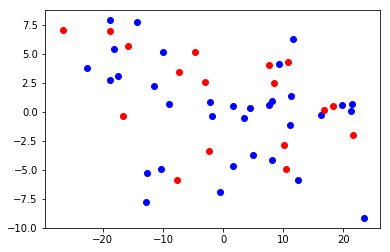

In [29]:
regr.fit(X_train,y_train)
X_test=np.atleast_2d(X_test).T
print("checking that the shapes of arrays are compatible",X_test.shape,y_test.shape)


y_fit1=regr.predict(X_test)
#y_fit1 (17,)is a vector, is corresponding to y_test
y_hat1=(regr.intercept_+np.atleast_2d(X_test*regr.coef_))  
#y_hat1 (1,17) is martix, is corresponding to X_test

  
plt.scatter(y_train,(y_fit0-y_train),c='b')
plt.scatter(y_test,(y_fit1-y_test),c='r')
#check for obvious differences in errors for training and test sets


## conclusion:
the scikit-learn hide the inside functions, make the programming of linear regression easier. 
just make a regr and fit the training data, then predict.

### if possible:
look at the code in scikit-learn about the linear regression. to make a better understanding.

# 2. optional:using one of the scikit-learn tutorials on a diabetes dataset
# BEGIN